In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
# from xgb import XGBoostRegressor


In [2]:
df = pd.read_csv("data\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
x = df.drop("math_score",axis=1)
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
# preprocessing
categorical_features = [feature for feature in x.select_dtypes(include="object")]
numerical_features = [feature for feature in x.select_dtypes(exclude="object")]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

numeric_transformer = StandardScaler()
oh_encoder = OneHotEncoder() 

ct = ColumnTransformer(transformers=[
    ("one hot encoder", oh_encoder, categorical_features),
    ("numeric transformer", numeric_transformer, numerical_features)
])


ct.fit

<bound method ColumnTransformer.fit of ColumnTransformer(transformers=[('one hot encoder', OneHotEncoder(),
                                 ['gender', 'race_ethnicity',
                                  'parental_level_of_education', 'lunch',
                                  'test_preparation_course']),
                                ('numeric transformer', StandardScaler(),
                                 ['reading_score', 'writing_score'])])>

In [5]:
X = ct.fit_transform(x)
X 

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [6]:
def model_evaluator(y_true, y_pred):
    '''
    returns metrics of model
    y_true is true value
    y_pred is predicted value of model 
    '''
    mse = mean_squared_error(y_true,y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    rmse = np.sqrt(mse)
    score = r2_score(y_true, y_pred)

    print(f"mean squared error is : {mse}")
    print("-------------------------------------------------------------")
    print(f"mean absolute error is : {mae}")
    print("--------------------------------------------------------------")
    print(f"root mean squared error is : {rmse}")
    print("--------------------------------------------------------------")
    
    print(f"root mean squared error is : {score}")
    print("--------------------------------------------------------------")

    return mse,mae,rmse,score


In [7]:
y = df["math_score"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model_dict = {
    "linear regression":LinearRegression(),
    "ridge":Ridge(),
    "lasso":Lasso(),
    "svr":SVR(),
    "knn regressor":KNeighborsRegressor(),
    "random forest regressor":RandomForestRegressor(),
    "ada boost":AdaBoostRegressor(),
    "decision tree regressor":DecisionTreeRegressor()
}
model_lists = []
r2_scores = []
for i in range(len(model_dict.values())):
    print("===========================================================================================================================================================")
    model_lists.append(list(model_dict.keys())[i])
    
    print(list(model_dict.keys())[i].upper())
    print("===========================================================================================================================================================")

    model= list(model_dict.values())[i]
    model.fit(X_train,y_train)

    print("Model fitted")
    print("model evaluation begins")
    print("training_set evaluation")
    train_mse,train_mae,rmse,train_score = model_evaluator(y_train, model.predict(X_train))

    print("test_set evaluation")
    test_mse,test_mae,test_rmse,test_score = model_evaluator(y_test, model.predict(X_test))
    r2_scores.append(test_score)

In [15]:
pd.DataFrame(list(zip(model_lists, r2_scores)), columns=["models", "r2_score"]).sort_values(by=["r2_score"], ascending=False)

,models,r2_score
1,ridge,0.878124
0,linear regression,0.877543
6,ada boost,0.850634
5,random forest regressor,0.841658
2,lasso,0.827626
3,svr,0.787317
4,knn regressor,0.784045
7,decision tree regressor,0.719196


In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print("the r2 score of the model is ",score)

the r2 score of the model is  87.75433087227596


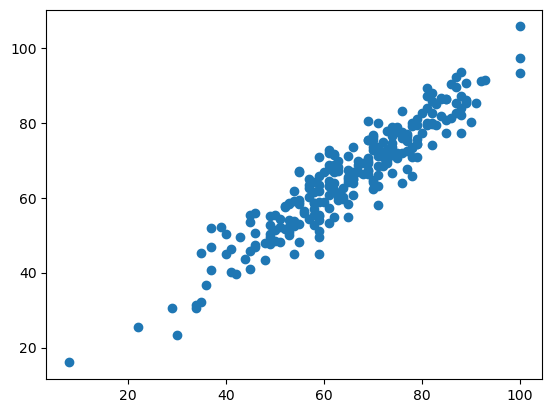

In [20]:
plt.scatter(y_test, y_pred)

<Axes: xlabel='math_score'>

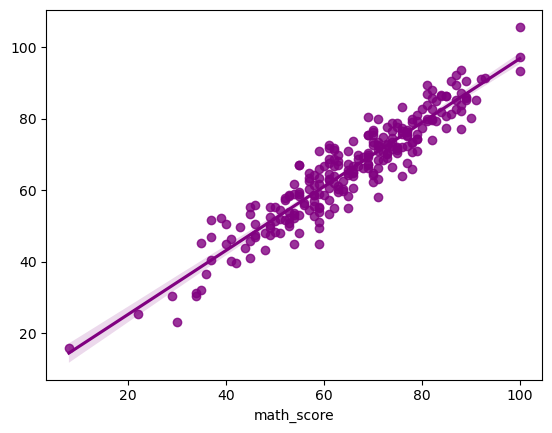

In [22]:
sns.regplot(x=y_test, y=y_pred, color="purple")

In [25]:
pred = pd.DataFrame({"actual value":y_test, "pred value":y_pred, "difference":y_test-y_pred})
pred.head()

,actual value,pred value,difference
649,69,69.354888,-0.354888
643,74,74.666815,-0.666815
339,35,45.272282,-10.272282
221,87,82.626914,4.373086
680,67,66.902060,0.097940
